In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

In [29]:
burritos_data = pd.read_csv('burritos.csv')

In [30]:
burritos_data

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Valentine's Mexican Food,Al Pastor,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Valentine's Mexican Food,Chile Relleno,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,Valentine's Mexican Food,California,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Valentine's Mexican Food,Shrimp,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
burritos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        423 non-null    object 
 1   Burrito         423 non-null    object 
 2   Date            423 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            416 non-null    float64
 10  Hunger          420 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          284 non-null    float64
 14  Circum          282 non-null    float64
 15  Volume          282 non-null    float64
 16  Tortilla        423 non-null    float64
 17  Temp            403 non-null    flo

Text(0.5, 1.0, 'Burritos dataset')

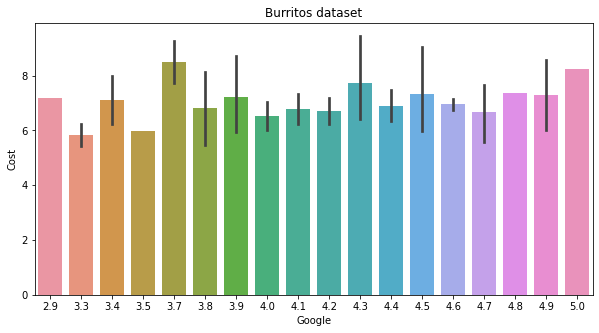

In [32]:
#1.bar chart of the distribution of values before handling NaN values
plt.figure(figsize=(10,5));
sns.barplot(y=burritos_data['Cost'], x=burritos_data['Google'])
plt.title("Burritos dataset")

In [33]:
#2.Determine how many missing values are present in each column
#Method 1
def missingValues(a):
    return sum(a.isnull())
print(burritos_data.apply(missingValues , axis =0))

Location          0
Burrito           0
Date              0
Neighborhood    331
Address         335
               ... 
Bacon           420
Sushi           421
Avocado         410
Corn            420
Zucchini        422
Length: 66, dtype: int64


In [34]:
#Method 2
burritos_data.isnull().sum()

Location          0
Burrito           0
Date              0
Neighborhood    331
Address         335
               ... 
Bacon           420
Sushi           421
Avocado         410
Corn            420
Zucchini        422
Length: 66, dtype: int64

In [35]:
#Determine the total amount of missing values (count of missing values of the entire datafram)
burritos_data.isnull().sum().sum()

18256

In [36]:
burritos_data.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Choose a column and replace NaN values with the mean
#mode(burritos_data['Google']) # so 4.1 is the most frequent number and the count is 12
#burritos_data[np.isnan(burritos_data)] = np.nanmean(burritos_data)
burritos_data['Google'].fillna(np.mean(burritos_data['Google']),inplace = True)

In [38]:
burritos_data.isnull().sum().sum()

17920

In [39]:
burritos_data.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.200000,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.300000,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,4.167816,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,4.167816,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.800000,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Choose a column and replace NaN values with the median
burritos_data['Cost'].fillna(np.median(burritos_data['Cost']),inplace = True)

In [41]:
burritos_data.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.200000,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.300000,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,4.167816,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,4.167816,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.800000,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Choose a column and replace NaN values with the mode
burritos_data['URL'].fillna(mode(burritos_data['URL']).mode[0], inplace = True)

In [43]:
burritos_data.tail()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
418,Valentine's Mexican Food,Al Pastor,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Valentine's Mexican Food,Chile Relleno,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,Valentine's Mexican Food,California,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Valentine's Mexican Food,Shrimp,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,Valentine's Mexican Food,Pollo Asado,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
 #Choose a column and replace NaN values with your own value
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
burritos_data['Fish']=burritos_data['Fish'].fillna(0)

In [45]:
burritos_data.isnull().sum().sum()

17167

In [46]:
# Choose a column and use backward filling
burritos_data['Address'].fillna(method= 'bfill')

0               6780 Miramar Rd
1      225 S Rancho Santa Fe Rd
2               3055 Harding St
3               3055 Harding St
4               3055 Harding St
                 ...           
418                         NaN
419                         NaN
420                         NaN
421                         NaN
422                         NaN
Name: Address, Length: 423, dtype: object

In [47]:
burritos_data.isnull().sum().sum()

17167

In [48]:
# Choose a column and use forwards filling
burritos_data['Cost'].fillna(method= 'ffill')

0      6.49
1      5.45
2      4.85
3      5.25
4      6.59
       ... 
418    6.00
419    6.00
420    7.90
421    7.90
422    5.50
Name: Cost, Length: 423, dtype: float64

In [49]:
burritos_data

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.200000,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.300000,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.800000,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Valentine's Mexican Food,Al Pastor,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Valentine's Mexican Food,Chile Relleno,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,Valentine's Mexican Food,California,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Valentine's Mexican Food,Shrimp,8/27/2019,NaN,NaN,https://www.yelp.com/biz/el-dorado-mexican-foo...,NaN,4.167816,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Burritos dataset')

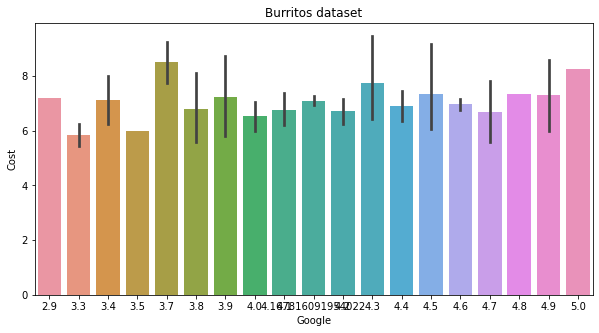

In [50]:
plt.figure(figsize=(10,5));
sns.barplot(y=burritos_data['Cost'], x=burritos_data['Google'])
plt.title("Burritos dataset")

In [51]:
# The End